In [4]:
%matplotlib inline

from pymc3 import  *

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('..')

In [5]:
true_intercept = 1
true_slope = 2
size=100
x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=.5,size=size)

data = dict(x=x, y=y)

In [6]:
df=pd.read_csv("../clean_data/tech_lse.csv")
df['past']=df['market_cap'].shift(1)
df['uk']=np.where(df['country_of_incorporation']=='United Kingdom', 1, 0)

In [36]:
df

,Unnamed: 0,year,month,ticker,list_date,company_name,icb_industry,icb_supersector,country_of_incorporation,market_cap,eps,p/e,p/s,datetime,past,uk
1,100,2017,11,AMO,2004-06-09,AMINO TECHNOLOGIES PLC,Technology,Technology,United Kingdom,137.250417,0.19,9.895488,1.315068,2017-11-01,12.760308,1
2,1007,2017,11,KBT,2001-03-28,K3 BUSINESS TECHNOLOGY GROUP PLC,Technology,Technology,United Kingdom,71.935664,-0.20,-8.364612,2.744186,2017-11-01,137.250417,1
3,1746,2017,11,TEK,2014-04-04,TEKCAPITAL PLC,Technology,Technology,United Kingdom,12.796412,0.10,2.975910,0.163721,2017-11-01,71.935664,1
4,3356,2017,1,ETX,2007-11-28,E-THERAPEUTICS PLC,Pharmaceuticals & Biotechnology,Biotechnology,United Kingdom,22.737899,-0.04,-2.121073,0.000000,2017-01-01,12.796412,1
5,3957,2016,6,ABC,2005-11-03,ABCAM,Pharmaceuticals & Biotechnology,Biotechnology,United Kingdom,1533.122429,0.21,35.963463,0.847291,2016-06-01,22.737899,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,152540,2018,9,OMG,2001-04-10,OXFORD METRICS PLC,Technology,Technology,United Kingdom,94.930000,0.03,25.314667,0.256000,2018-09-01,9.390000,1
583,152799,2018,9,SGE,2013-06-10,SAGE GROUP PLC,Technology,Technology,United Kingdom,6360.300000,0.32,18.318836,1.701382,2018-09-01,94.930000,1
584,152806,2018,9,SND,2004-12-16,SANDERSON GROUP PLC,Technology,Technology,United Kingdom,50.380000,0.06,13.994444,0.533333,2018-09-01,6360.300000,1
585,153044,2018,9,TOOP,2016-05-10,TOOPLE PLC,Technology,Technology,United Kingdom,2.770000,-0.01,-0.290356,0.001583,2018-09-01,50.380000,1


In [21]:
#features as arrays
df = df.dropna()
x_1=df["uk"].values
x_2=df["past"].values
time = df["year"].values + df["month"].values/12
y=df["market_cap"].values

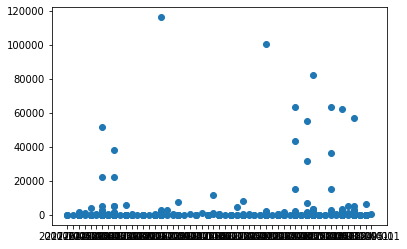

In [22]:
plt.scatter(df["datetime"],df["market_cap"])

ValueError: x and y must have same first dimension, but have shapes (100,) and (586,)

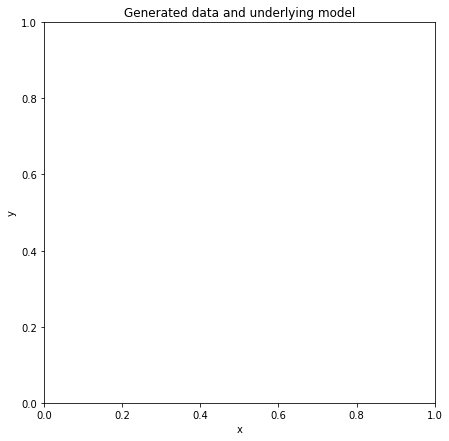

In [23]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0);

In [24]:
df.market_cap.mean()

1883.480541720963

In [25]:
x_1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [26]:
x_2

array([1.27603080e+01, 1.37250417e+02, 7.19356640e+01, 1.27964120e+01,
       2.27378987e+01, 1.53312243e+03, 4.86152109e+01, 1.45006469e+02,
       6.82647612e+02, 2.12764583e+02, 7.59666543e+01, 1.19367590e+02,
       2.44849060e+01, 9.46814202e+02, 1.51594505e+00, 6.90581222e+01,
       8.72920785e+00, 1.39264103e+02, 1.37362993e+03, 5.15150100e+01,
       7.37890118e+00, 3.88776000e+01, 3.20235825e+01, 4.12087928e+03,
       3.62227514e+01, 1.15907092e+01, 4.38213362e+02, 7.70309540e+01,
       3.08067162e+03, 2.25723287e+04, 5.89701490e+01, 8.87225200e+01,
       4.50456470e+01, 1.03382117e+02, 6.15985400e+02, 8.47578370e+01,
       1.62554979e+02, 1.21157470e+01, 3.93650923e+02, 4.01048809e+02,
       1.16325546e+02, 5.22280044e+03, 2.02600921e+03, 2.53568700e+01,
       9.81915700e+00, 1.32738028e+03, 9.57977466e+02, 3.35996030e+01,
       8.58383800e+00, 3.71716490e+01, 5.18093516e+04, 7.19293140e+01,
       5.77847183e+01, 3.94457582e+01, 4.52810055e+01, 6.85591535e+02,
      

In [64]:
with Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = InverseGamma('sigma', alpha=2, beta=1/9, testval=1.)
    intercept = Normal('Intercept', 1880, sd=1)
    x1_coeff = Normal('x_1', 50, sd=5)
    x2_coeff= Normal('x_2', 0, sd=2)
    time_coeff = Normal('time', 0, sd=1)
    
    # Define likelihood
    likelihood = Normal('y', mu=intercept +x1_coeff * x_1 + x_2 * x2_coeff+ time, 
                        sd=sigma, observed=y)
    
    # Inference!
    start = find_MAP()
    trace = sample(2000, progressbar=True, cores=4, start=start) # draw posterior samples using NUTS sampling

/home/harrison/Documents/work/citadel-challenge-2.0/.env/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -6,272.2, ||grad|| = 0.057252: 100%|██████████| 32/32 [00:00<00:00, 2906.40it/s]       
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [time, x_2, x_1, Intercept, sigma]
Sampling 4 chains: 100%|██████████| 10000/10000 [00:05<00:00, 1795.62draws/s]


In [65]:
start

{'sigma_log__': array(9.21697056),
 'Intercept': array(1879.99976117),
 'x_1': array(49.99972156),
 'x_2': array(-0.04753016),
 'time': array(0.),
 'sigma': array(10066.52218673)}

In [66]:
for v in trace.points():
    print(v)

{'sigma_log__': 9.230727847879436, 'Intercept': 1879.9801575848537, 'x_1': 49.27875907007599, 'x_2': -0.06387239887656154, 'time': -0.3072484309420873, 'sigma': 10205.967200576533}
{'sigma_log__': 9.220171221845126, 'Intercept': 1880.6274775221018, 'x_1': 52.1586418467385, 'x_2': 0.011113788304237801, 'time': 1.174174285941902, 'sigma': 10098.79331414877}
{'sigma_log__': 9.223317254980634, 'Intercept': 1879.5681971901106, 'x_1': 48.470124667257885, 'x_2': -0.10862336525992122, 'time': -1.4472197220669951, 'sigma': 10130.614481521316}
{'sigma_log__': 9.204223843530343, 'Intercept': 1879.6457540480092, 'x_1': 50.885778816465596, 'x_2': -0.03782838054214877, 'time': 1.678975502031358, 'sigma': 9939.0213943401}
{'sigma_log__': 9.25874741131068, 'Intercept': 1880.3886092454893, 'x_1': 54.859779999962036, 'x_2': -0.07891157713603947, 'time': 0.13426139821749872, 'sigma': 10495.97795975413}
{'sigma_log__': 9.219911126730285, 'Intercept': 1880.3922341357725, 'x_1': 54.70801657042603, 'x_2': -0

{'sigma_log__': 9.241964073793287, 'Intercept': 1881.0503860482, 'x_1': 44.45743033346524, 'x_2': -0.05331934471001328, 'time': 0.006403884403978544, 'sigma': 10321.290439373017}
{'sigma_log__': 9.169909527745192, 'Intercept': 1879.8891994067817, 'x_1': 50.92424460308337, 'x_2': -0.013413706761756553, 'time': 1.9515261701621918, 'sigma': 9603.755777265735}
{'sigma_log__': 9.263320251685954, 'Intercept': 1880.070464854128, 'x_1': 43.712452095842885, 'x_2': -0.08012423206654001, 'time': -1.9264314761046948, 'sigma': 10544.084299022992}
{'sigma_log__': 9.17298822896419, 'Intercept': 1879.8482613474532, 'x_1': 55.94682095565447, 'x_2': -0.03003887921083718, 'time': 2.0830009900043893, 'sigma': 9633.368432753387}
{'sigma_log__': 9.184365739225651, 'Intercept': 1880.224297569013, 'x_1': 47.9445380871712, 'x_2': -0.06639433879932208, 'time': -0.5375592372843339, 'sigma': 9743.598061235269}
{'sigma_log__': 9.271055248247917, 'Intercept': 1880.8089658617614, 'x_1': 50.98622480941564, 'x_2': -0.

{'sigma_log__': 9.23294615781537, 'Intercept': 1879.7848959518692, 'x_1': 50.285747403856675, 'x_2': -0.06248261544727339, 'time': -0.6357151373708334, 'sigma': 10228.632328868633}
{'sigma_log__': 9.23294615781537, 'Intercept': 1879.7848959518692, 'x_1': 50.285747403856675, 'x_2': -0.06248261544727339, 'time': -0.6357151373708334, 'sigma': 10228.632328868633}
{'sigma_log__': 9.23294615781537, 'Intercept': 1879.7848959518692, 'x_1': 50.285747403856675, 'x_2': -0.06248261544727339, 'time': -0.6357151373708334, 'sigma': 10228.632328868633}
{'sigma_log__': 9.175262474771014, 'Intercept': 1878.401815125456, 'x_1': 47.31864101965784, 'x_2': -0.09200303428429556, 'time': -0.8063648558936523, 'sigma': 9655.302012239024}
{'sigma_log__': 9.244574942468722, 'Intercept': 1881.29868886873, 'x_1': 52.152111979809895, 'x_2': -0.0016824257087575331, 'time': -0.12264738292565591, 'sigma': 10348.27318214255}
{'sigma_log__': 9.203096905641369, 'Intercept': 1878.6077545142618, 'x_1': 49.00833386211912, 'x

In [9]:
with Model() as model:
    # specify glm and pass in data. The resulting linear model, its likelihood and 
    # and all its parameters are automatically added to our model.
    GLM.from_formula('y ~ x', data)
    trace = sample(progressbar=True, tune=1000, cores=4) # draw posterior samples using NUTS sampling

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, x, Intercept]


//anaconda3/envs/snakes/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 504x504 with 0 Axes>

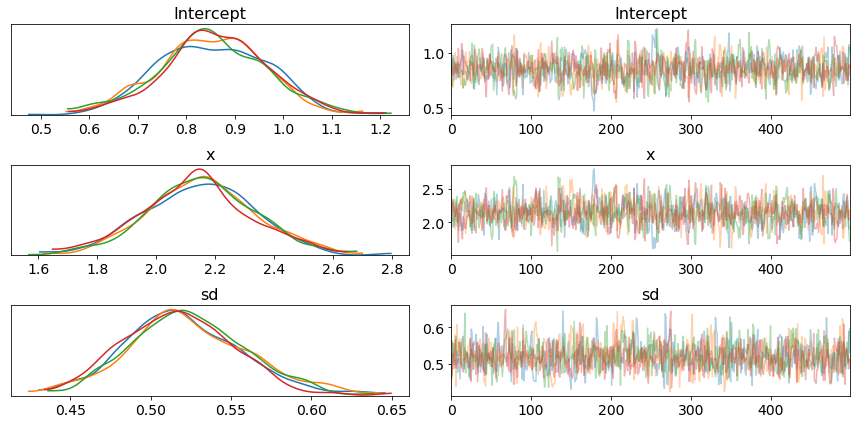

In [10]:
plt.figure(figsize=(7, 7))
traceplot(trace)
plt.tight_layout();

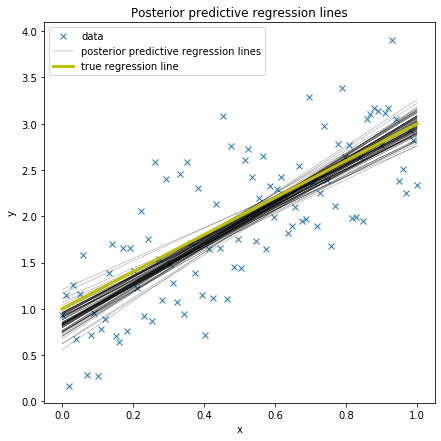

In [11]:
plt.figure(figsize=(7, 7))
plt.plot(x, y, 'x', label='data')
plots.plot_posterior_predictive_glm(trace, samples=100, 
                                    label='posterior predictive regression lines')
plt.plot(x, true_regression_line, label='true regression line', lw=3., c='y')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y');